# 2019/12/09 - 2019/12/15
## Logistic Regression Implement by Luo

In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score

### Iris Dataset
#### 75% for training 25% for testing

In [15]:
iris_data = datasets.load_iris()
print(iris_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [16]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df['target'] = iris_data['target']
iris_df = iris_df[iris_df.target != 2]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
random_indexs = np.random.permutation(len(iris_df))
train_sample_size = int(len(iris_df) * 0.75)
train_df = iris_df.iloc[random_indexs[:train_sample_size], [2, 3, 4]]
test_df = iris_df.iloc[random_indexs[train_sample_size:], [2, 3, 4]]
train_df.head()

,petal length (cm),petal width (cm),target
42,1.3,0.2,0
5,1.7,0.4,0
70,4.8,1.8,1
96,4.2,1.3,1
10,1.5,0.2,0


### Logistic Regression Model
### $P(Class_i\mid x) = \sigma( w \cdot x + b)$
### where $\sigma(z)= \dfrac{1}{1+\exp(-z)}$

### Loss function: Cross Entropy
###  $C\left(f(x^n, \hat{y}^n)\right) =  \displaystyle\sum_{n=1}^{N}-\left[\hat{y}^n \times \log\left(f_{w,b}(x^n)\right) + (1-\hat{y}^n) \times \log(1-f_{w, b}(x^n))\right]$

In [18]:
def cross_entropy(p, y):
    return np.sum(-(y * np.log(p + 0.001) + (1-y) * np.log(1 -p + 0.001)))

### Trained by Gradient Descent
### $w_{i+1} = w_i - \eta \times \displaystyle\sum_{n}-(\hat{y}^n - f_{w,b}(x^n)) \times x_i^n$ 
### $b_{i+1}=b_i + \eta \times \displaystyle\sum_{n}(\hat{y}^n - f_{w,b}(x^n))\times f_{w,b}(x^n)\times(1-f_{w,b}(x^n))\times x^n$

In [19]:
def predict(x, w, b):
    p = 1 / (1 + np.exp(-(x @ w + b))).flatten()
    y_hat = [0 if x <= 0.5 else 1 for x in p]
    return p, y_hat

In [20]:
def train_by_gradient_descent(x, y, w, b, loss_fn, lr, loss=5):
    loss_historys = []
    while loss > 3:
        p, _ = predict(x, w, b)
        loss = loss_fn(p, y)
        w_gradient = -((y - p) @ x).reshape(w.shape)
        b_gradient = -(np.sum(((y - p) * p * (1 - p)) @ x, axis=0))
        w = w - lr * w_gradient
        b = b - lr * b_gradient
        loss_historys.append(loss)
    print('trained weight: ', w)
    print('trained intercept: ', b)
    print('loss: ', loss)
    plt.plot(np.arange(len(loss_historys)), loss_historys)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    return (w, b)

In [21]:
x = train_df[['petal length (cm)', 'petal width (cm)']].values
y = train_df['target'].values
w = np.zeros((2, 1))
b = np.ones(1)

trained weight:  [[-0.78846649]
 [ 9.88955269]]
trained intercept:  [-4.84988834]
loss:  2.9998511885279986


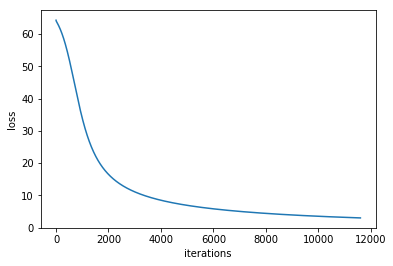

In [22]:
train_w, train_b = train_by_gradient_descent(
    x, y, w, b, cross_entropy, 0.001)

### Check Train Accuracy

In [23]:
p, y_hat = predict(x, train_w, train_b)

In [24]:
print(accuracy_score(y, y_hat))

1.0


### Check Test Accuracy

In [25]:
x_test = test_df[['petal length (cm)', 'petal width (cm)']].values
y_test = test_df['target'].values

In [27]:
p, y_hat = predict(x_test, train_w, train_b)

In [28]:
print(accuracy_score(y_test, y_hat))

1.0


### Plot Decision Boundary

In [29]:
def make_meshgrid(x, y, h=0.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    
    return xx, yy

In [34]:
xx, yy = make_meshgrid(train_df.iloc[:, 0], train_df.iloc[:, 1])
coordinates = np.c_[xx.ravel(), yy.ravel()]
_, predictions = predict(coordinates, train_w, train_b)

predictions = np.array(predictions).reshape(xx.shape)

Text(0,0.5,'petal width')

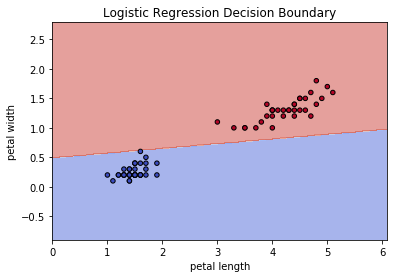

In [36]:
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(train_df.iloc[:, 0], train_df.iloc[:, 1], c=train_df.iloc[:, 2], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('petal length')
plt.ylabel('petal width')